In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
import seaborn as sns

In [4]:
data = pd.read_csv('https://www.statlearning.com/s/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

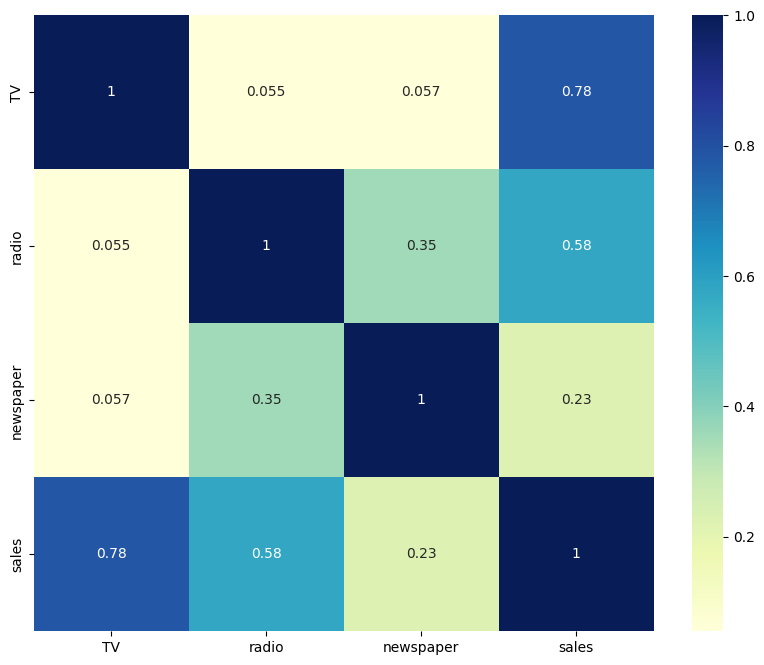

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)

In [7]:
X = data[['TV', 'radio', 'newspaper']]
# X = data[['TV', 'radio']]
y = data['sales']

Text(0.5, 1.0, 'newspaper vs Sales')

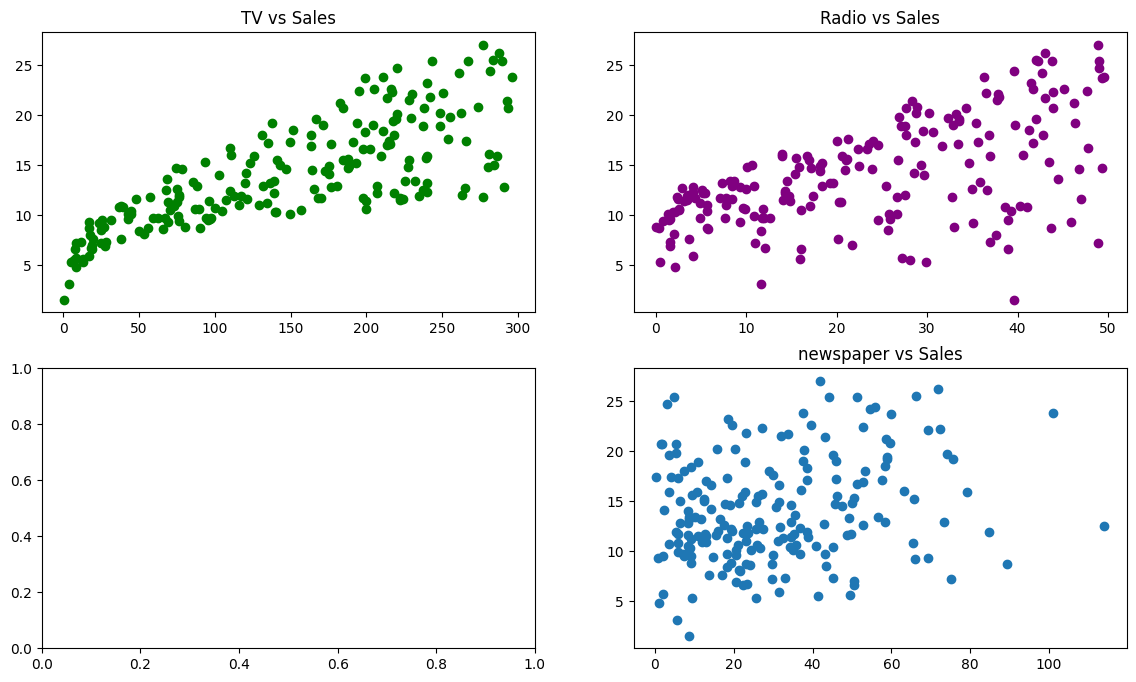

In [8]:
fig, axes = plt.subplots(2,2,figsize=(14,8))
axes[0,0].scatter(X.TV,y,color='g')
axes[0,0].set_title("TV vs Sales")
axes[0,1].scatter(X.radio,y,color='purple')
axes[0,1].set_title("Radio vs Sales")
# axes[1,0].scatter(X.const,y,color='r')
# axes[1,0].set_title("const vs Sales")
axes[1,1].scatter(X.newspaper,y)
axes[1,1].set_title("newspaper vs Sales")

In [9]:
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())
y_pred = ols_model.predict(X_const)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 14 May 2025   Prob (F-statistic):           1.58e-96
Time:                        08:48:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0